<a href="https://colab.research.google.com/github/adlinjency/Nan-Mudhalvan/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.age=df.age.astype('int32')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dropna(axis=0,inplace=True)
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.drop(columns='id',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   int32  
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(2), int32(1), int64(3), object(5)
memory usage: 441.0+ KB


In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.854145,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.575986,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.gender.value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [ ]:
df=df[df['gender']!='Other']
x=df.gender.value_counts()
print(x)

Female    2897
Male      2011
Name: gender, dtype: int64


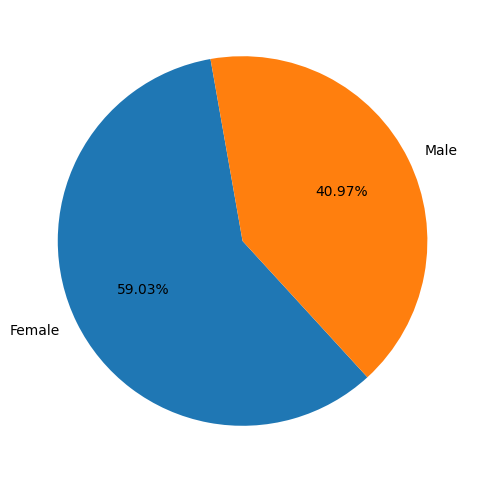

In [ ]:
plt.figure(figsize=(12, 6))
plt.pie(x, labels=x.index, autopct='%1.2f%%', startangle=100)
plt.show()

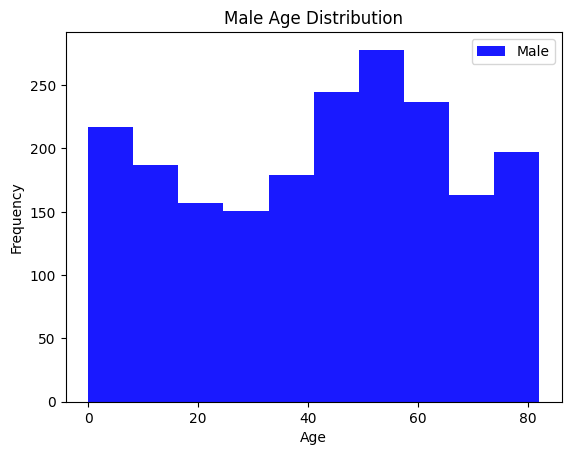

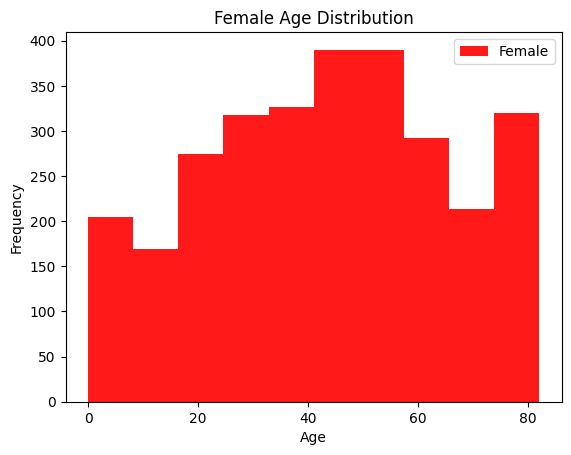

In [ ]:
plt.figure()
plt.hist(df[df['gender'] == 'Male']['age'], bins=10, alpha=0.9, label='Male',color='blue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.title('Male Age Distribution')

plt.show()

plt.figure()
plt.hist(df[df['gender'] == 'Female']['age'], bins=10, alpha=0.9, label='Female',color='red')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.title('Female Age Distribution')

plt.show()

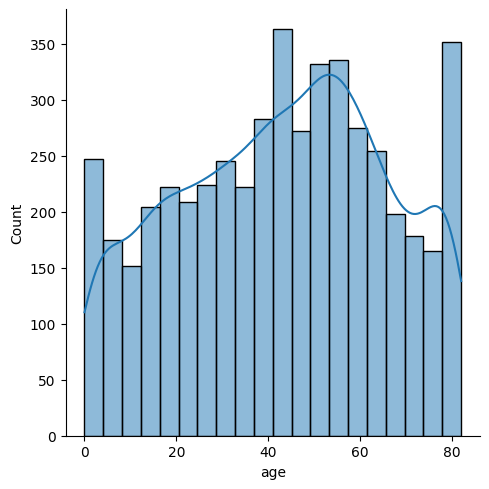

In [ ]:
sns.displot(df['age'], kde =True)

In [ ]:
df = df.rename(columns={'ever_married': 'Married'})
df

,gender,age,hypertension,heart_disease,Married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.hypertension.value_counts()

0    4457
1     451
Name: hypertension, dtype: int64

In [ ]:
pd.crosstab(df.gender,df.hypertension)

hypertension,0,1
gender,,
Female,2646,251
Male,1811,200


<Axes: xlabel='gender', ylabel='count'>

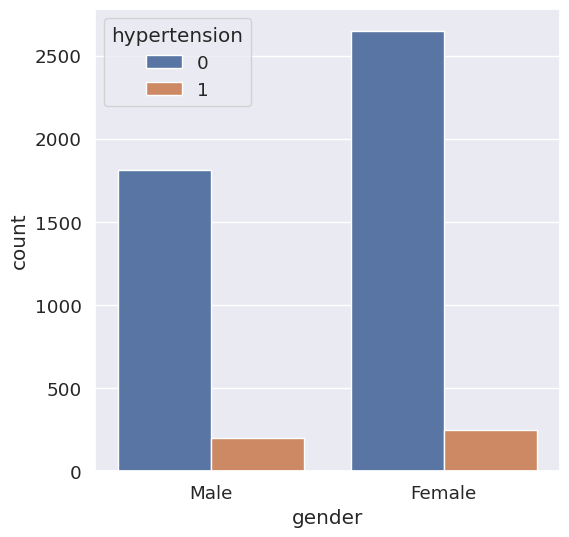

In [ ]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set(font_scale=1.2)
sns.countplot(data=df,x='gender',hue=df.hypertension)

<Axes: xlabel='gender', ylabel='count'>

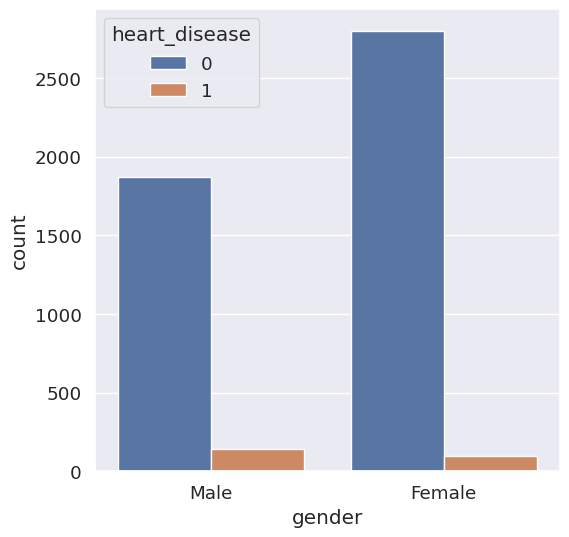

In [ ]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set(font_scale=1.2)
sns.countplot(data=df,x='gender',hue=df.heart_disease)

In [ ]:
pd.crosstab(df.gender,df.heart_disease)

heart_disease,0,1
gender,,
Female,2797,100
Male,1868,143


In [ ]:
df.Married.value_counts()

Yes    3204
No     1704
Name: Married, dtype: int64

In [ ]:
x=pd.crosstab([df.Married,df.gender],[df.hypertension])
print(x)

hypertension       0    1
Married gender           
No      Female   935   29
        Male     722   18
Yes     Female  1711  222
        Male    1089  182


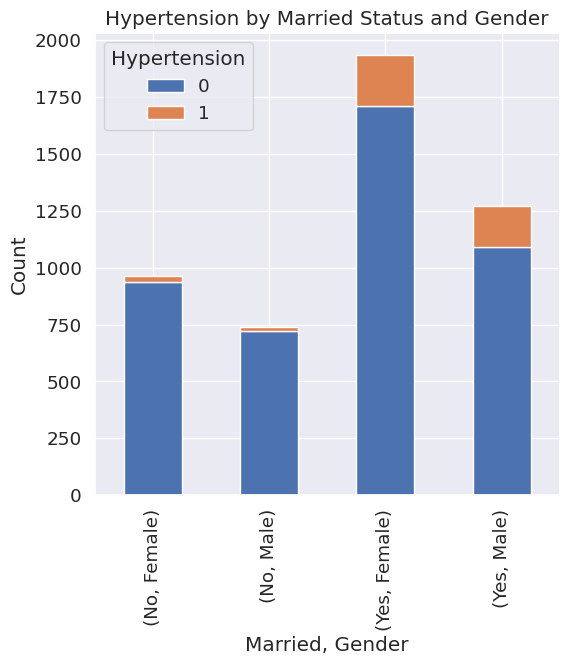

In [ ]:
x.plot(kind='bar', stacked=True)
plt.xlabel('Married, Gender')
plt.ylabel('Count')
plt.title('Hypertension by Married Status and Gender')
plt.legend(title='Hypertension')
plt.show()

In [ ]:
y=pd.crosstab([df.Married,df.gender],[df.heart_disease])
print(y)

heart_disease      0    1
Married gender           
No      Female   949   15
        Male     727   13
Yes     Female  1848   85
        Male    1141  130


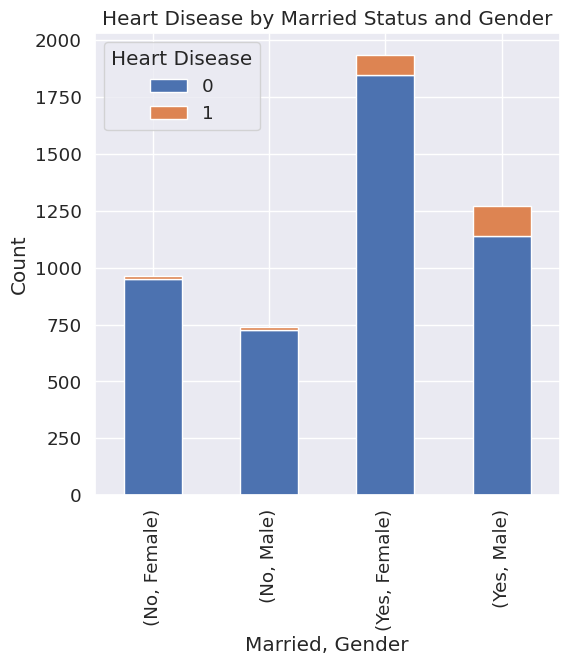

In [ ]:
y.plot(kind='bar', stacked=True)
plt.xlabel('Married, Gender')
plt.ylabel('Count')
plt.title('Heart Disease by Married Status and Gender')
plt.legend(title='Heart Disease')
plt.show()

In [ ]:
df.groupby(['heart_disease','hypertension'])['age'].agg(['mean','median','min','max'])

mean  median  min  max
heart_disease hypertension                             
0             0             39.732912    40.0    0   82
              1             61.106870    62.0   17   82
1             0             67.556757    70.0    2   82
              1             70.568966    72.5   41   82

In [ ]:
df.work_type.value_counts()

Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
pd.crosstab(df.gender,df.work_type)

work_type,Govt_job,Never_worked,Private,Self-employed,children
gender,,,,,
Female,384,11,1705,477,320
Male,246,11,1105,298,351


<Axes: xlabel='work_type', ylabel='count'>

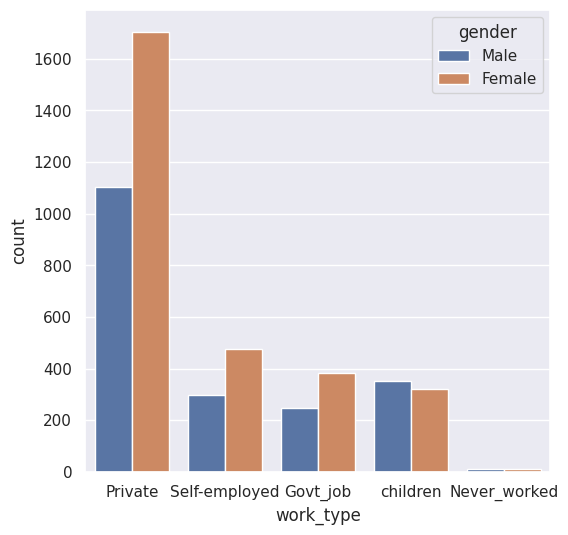

In [ ]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(data=df,x=df.work_type,hue=df.gender)

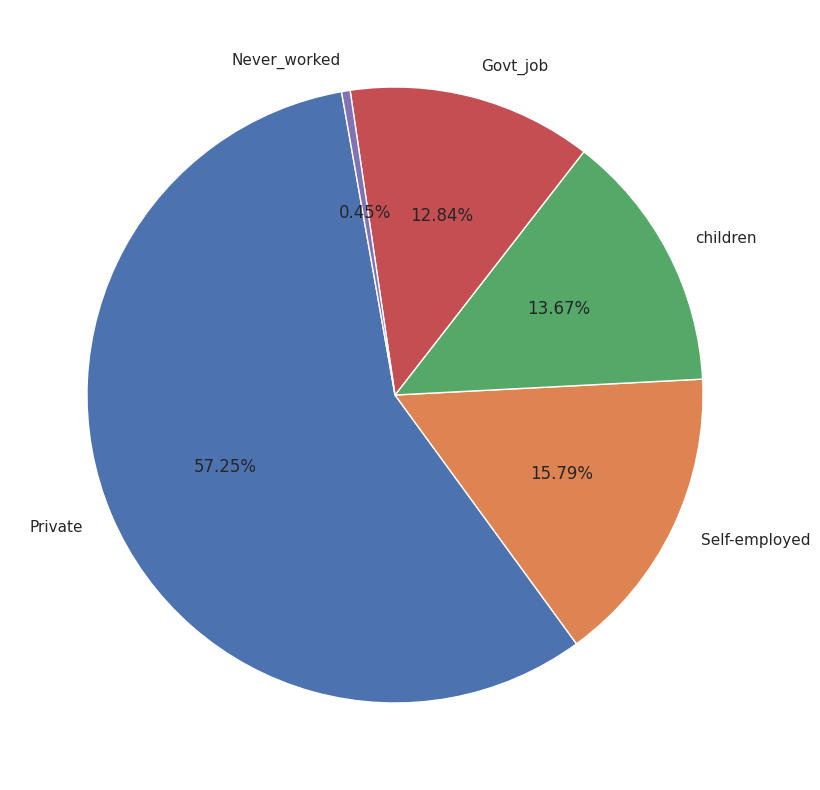

In [ ]:
x=df.work_type.value_counts()
plt.figure(figsize=(20, 10))
plt.pie(x, labels=x.index, autopct='%1.2f%%', startangle=100)
plt.show()

In [ ]:
df.Residence_type.value_counts()

Urban    2490
Rural    2418
Name: Residence_type, dtype: int64

<Axes: xlabel='Residence_type', ylabel='count'>

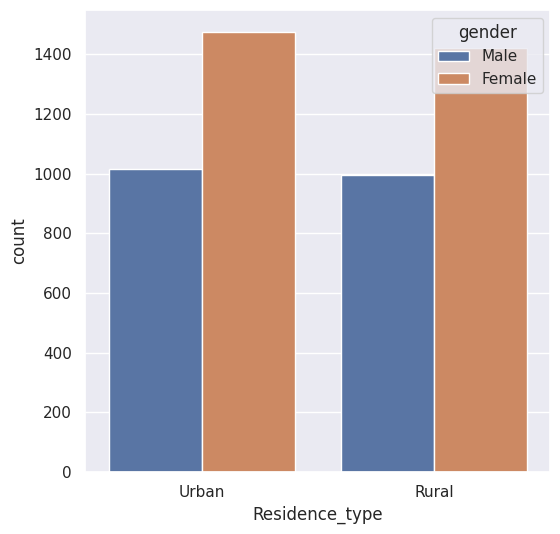

In [ ]:
sns.countplot(data=df,x=df.Residence_type,hue=df.gender)

In [ ]:
y=pd.crosstab([df.gender,df.Married],df.Residence_type)

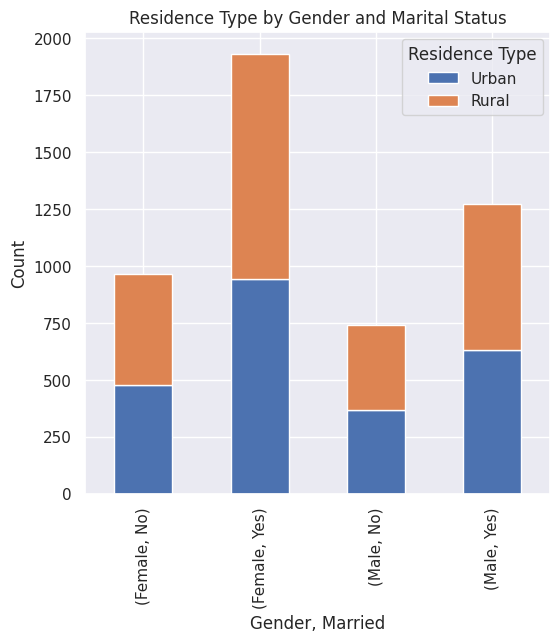

In [ ]:
y.plot(kind='bar', stacked=True)
plt.xlabel('Gender, Married')
plt.ylabel('Count')
plt.title('Residence Type by Gender and Marital Status')
plt.legend(title='Residence Type', labels=['Urban', 'Rural'])
plt.show()

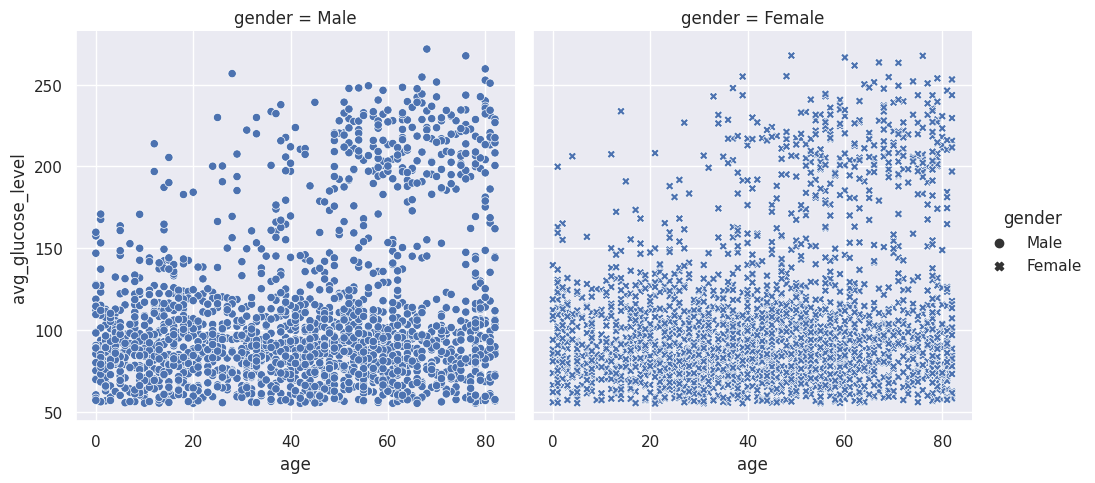

In [ ]:
sns.relplot(data=df,x='age',y='avg_glucose_level',kind='scatter',col='gender',style='gender')

<Axes: xlabel='age', ylabel='avg_glucose_level'>

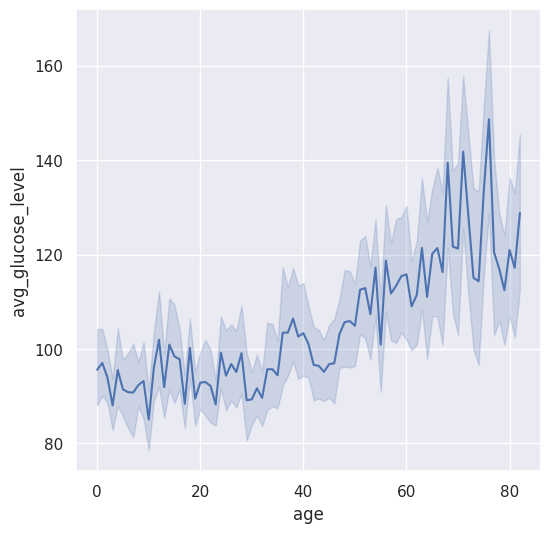

In [ ]:
sns.lineplot(data=df,x='age',y='avg_glucose_level')

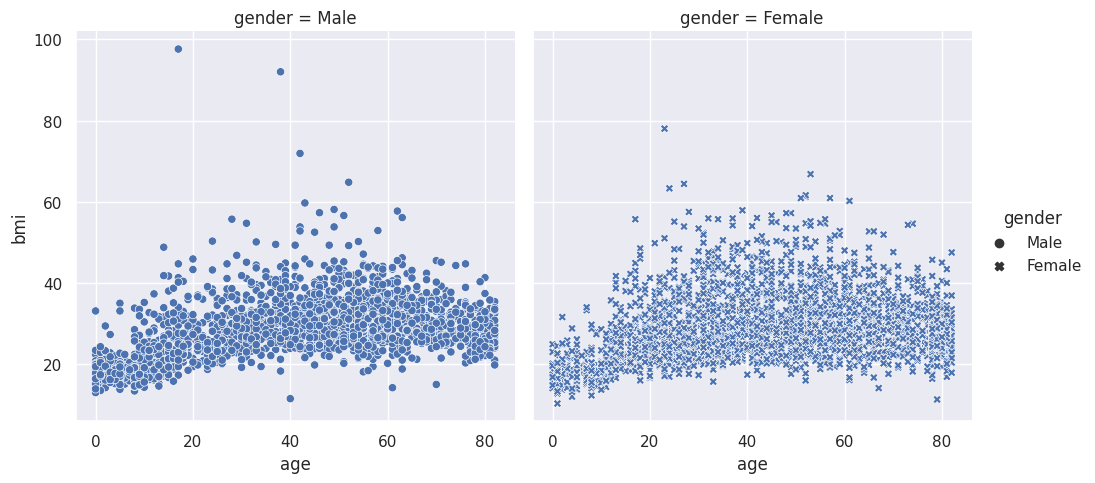

In [ ]:
sns.relplot(data=df,x='age',y='bmi',kind='scatter',col='gender',style='gender')

<Axes: xlabel='age', ylabel='bmi'>

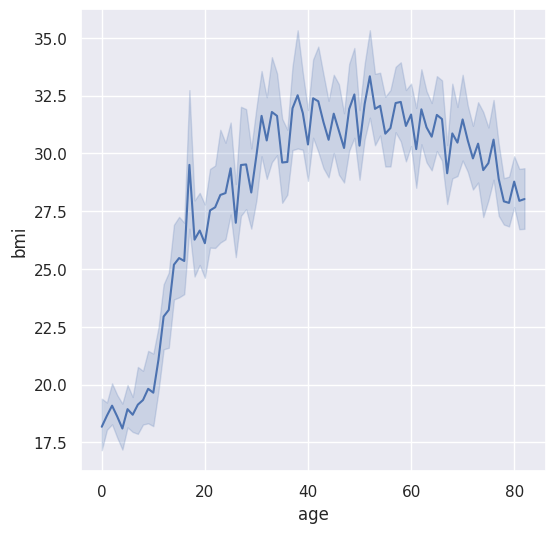

In [ ]:
sns.lineplot(data=df,x='age',y='bmi')

In [ ]:
x=pd.crosstab([df.Residence_type,df.gender],df.smoking_status)
print(x)

smoking_status         Unknown  formerly smoked  never smoked  smokes
Residence_type gender                                                
Rural          Female      410              218           596     198
               Male        328              188           342     138
Urban          Female      401              240           607     227
               Male        344              190           307     174


<Axes: xlabel='smoking_status', ylabel='count'>

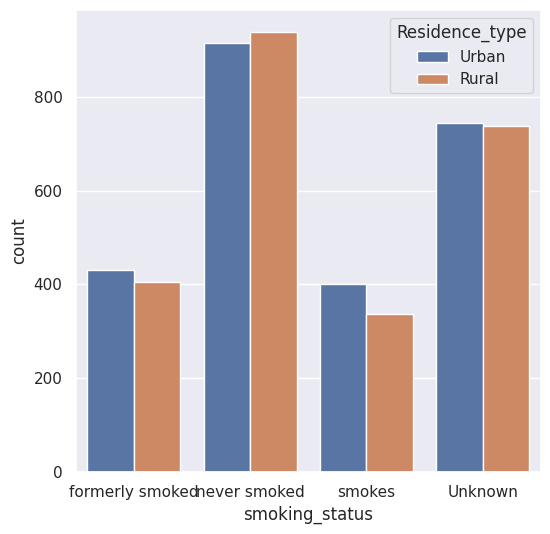

In [ ]:
sns.countplot(data=df,x=df.smoking_status,hue=df.Residence_type)

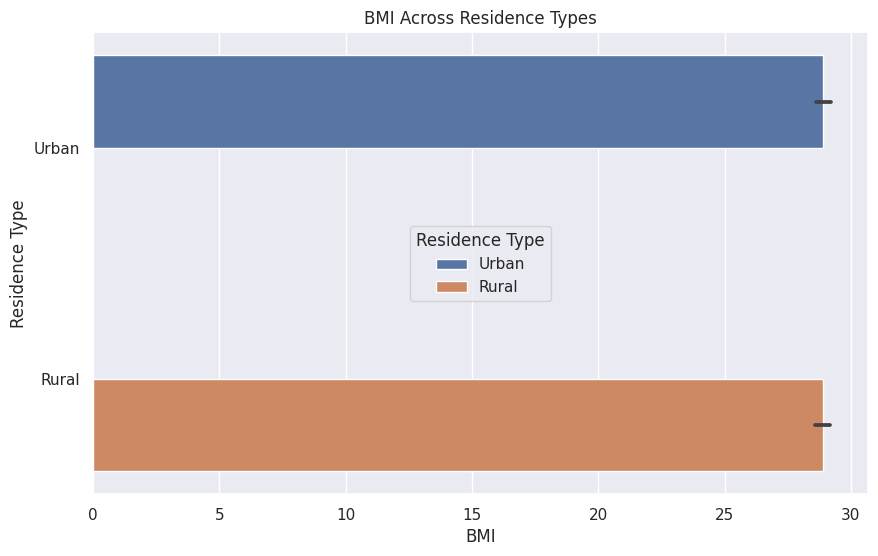

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x='bmi', y='Residence_type', hue='Residence_type', data=df)
plt.xlabel('BMI')
plt.ylabel('Residence Type')
plt.title('BMI Across Residence Types')
plt.legend(title='Residence Type', loc='center')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
le=LabelEncoder()
df

,gender,age,hypertension,heart_disease,Married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.avg_glucose_level=df['avg_glucose_level'].astype('int64')
df.bmi=df['bmi'].astype('int64')

In [ ]:
df["gender"]=le.fit_transform(df["gender"])
df["Married"]=le.fit_transform(df["Married"])
df["work_type"]=le.fit_transform(df["work_type"])
df["Residence_type"]=le.fit_transform(df["Residence_type"])
df["smoking_status"]=le.fit_transform(df["smoking_status"])
df.head()

,gender,age,hypertension,heart_disease,Married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228,36,1,1
2,1,80,0,1,1,2,0,105,32,2,1
3,0,49,0,0,1,2,1,171,34,3,1
4,0,79,1,0,1,3,0,174,24,2,1
5,1,81,0,0,1,2,1,186,29,1,1
